# Project tif data on mesh and export in slf

Various data from aerial/satellite imagery are stored in .tif format. It can be very useful to project this kind of data on a mesh, for example to make comparison between tif imagery and telemac results.
In this notebook, we show how to project data in .tif format on a triangular mesh using pretel. We also show how to save tif data in a selafin result file as a new field.


In [1]:
from os import path, environ, remove
import numpy as np
import rasterio
import matplotlib.pyplot as plt
from data_manip.extraction.telemac_file import TelemacFile
from pretel.tif_processing import tif_to_slf, get_tif_data_on_triangular_mesh
from postel.plot2d import *

## Main files (tif and telemac res or geometry file)

In [2]:
# TIR file
tif_file = path.join(environ['HOMETEL'], 'notebooks', 'data', 'example-tir.tif')

In [3]:
# Telemac result
geo_file = path.join(environ['HOMETEL'], 'examples', 'telemac2d', 'gouttedo', 'f2d_gouttedo.slf')
res_file = path.join(environ['HOMETEL'], 'examples', 'telemac2d', 'gouttedo', 'f2d_gouttedo.slf')

## Loading tif with rasterio

In [4]:
# Opening tir file
src = rasterio.open(tif_file)

# tir data
tif_data = src.read(1)

In [5]:
# Properties of raster file:
print("Number of pixels on the vertical axis: ", src.height)
print("Number of pixels on the horizontal axis: ", src.width)
print("Raster coordonate system:", src.crs)
print("Top left point coordonates:", src.xy(0, 0))
print("Bottom right point coordonates:", src.xy(src.width, src.height))
print("Bottom left point coordonates:", src.xy(src.width, 0))
print("Center point coordonates:", src.xy(src.height//2, src.width//2))

Number of pixels on the vertical axis:  716
Number of pixels on the horizontal axis:  716
Raster coordonate system: EPSG:2154
Top left point coordonates: (0.013966480446927375, 19.98603351955307)
Bottom right point coordonates: (20.01396648044693, -0.013966480446928387)
Bottom left point coordonates: (0.013966480446927375, -0.013966480446928387)
Center point coordonates: (10.013966480446928, 9.986033519553072)


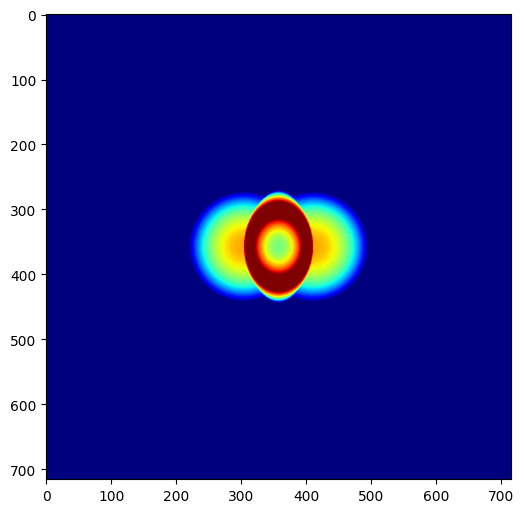

In [6]:
# plot TIR
fig, ax = plt.subplots(figsize=(6, 10))
ax.imshow(tif_data, cmap='jet')
plt.show()

## Projection of tif data on mesh

In [7]:
res = TelemacFile(res_file)

In [8]:
tir_data_on_2d_mesh = get_tif_data_on_triangular_mesh(res, tif_file, translation_xy=[0, 0])

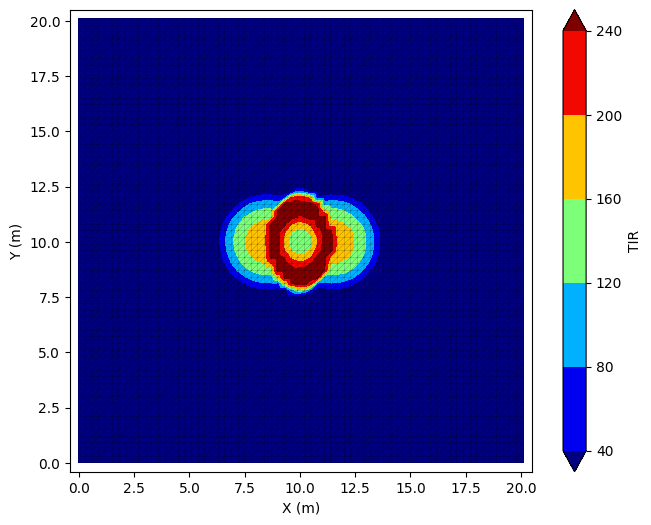

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.set_aspect('equal')
plot2d_scalar_filled_contour(fig, ax, res.tri, tir_data_on_2d_mesh, data_name='TIR', extend="both")
plot2d_triangle_mesh(ax, res.tri,  x_label='X (m)', y_label='Y (m)', color='k', linewidth=0.1)
plt.show()
plt.close(fig)

## Projection of TIR data on mesh and save in .slf file

In [10]:
tif_slf_file = path.join(environ['HOMETEL'], 'notebooks', 'data', 'example_tif2slf.slf')

In [11]:
tif_to_slf(
    geo_file,
    tif_file,
    tif_slf_file,
    var_name='TIR',
    var_unit='')

In [12]:
res = TelemacFile(tif_slf_file)

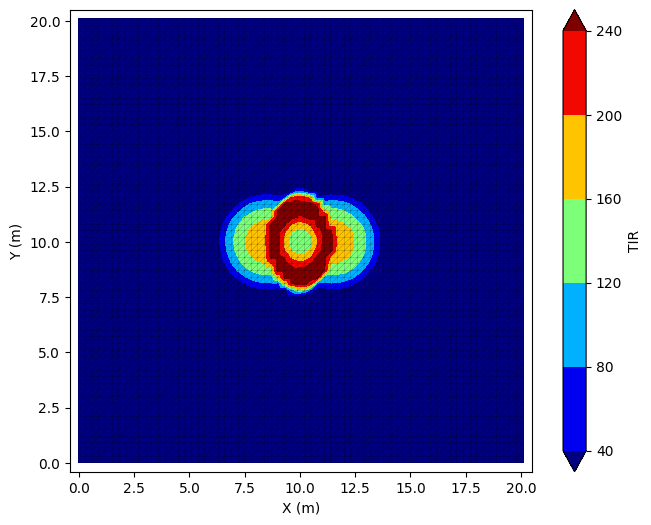

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.set_aspect('equal')
plot2d_scalar_filled_contour(fig, ax, res.tri, tir_data_on_2d_mesh, data_name='TIR', extend="both")
plot2d_triangle_mesh(ax, res.tri,  x_label='X (m)', y_label='Y (m)', color='k', linewidth=0.1)
plt.show()
plt.close(fig)

In [14]:
# remove created file
res.close()
remove(tif_slf_file)